In [7]:
import numpy as np
import matplotlib.pyplot as plt

class UnionFind:
    def __init__(self, size):
        self.parent = np.arange(size, dtype=int)
        self.rank = np.zeros(size, dtype=int)
    
    def find(self, i):
        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]
    
    def union(self, i, j):
        i_root = self.find(i)
        j_root = self.find(j)
        
        if i_root == j_root:
            return
        
        if self.rank[i_root] < self.rank[j_root]:
            self.parent[i_root] = j_root
        elif self.rank[i_root] > self.rank[j_root]:
            self.parent[j_root] = i_root
        else:
            self.parent[j_root] = i_root
            self.rank[i_root] += 1

def ccl(image):
    # Create a Union-Find data structure with one node per pixel
    uf = UnionFind(image.size)
    
    # Iterate over the image and merge adjacent pixels
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if image[y, x] == 0:
                continue
            
            if x > 0 and image[y, x-1] == 1:
                uf.union(y*image.shape[1] + x, y*image.shape[1] + x-1)
            
            if y > 0 and image[y-1, x] == 1:
                uf.union(y*image.shape[1] + x, (y-1)*image.shape[1] + x)
    
    # Compress the Union-Find data structure
    for i in range(image.size):
        uf.find(i)
    
    # Create a label image
    labels = np.zeros_like(image, dtype=int)
    
    # Assign a unique label to each connected component
    label = 1
    label_dict = {}
    
    for i in range(image.size):
        if image.flat[i] == 0:
            continue
        
        if uf.parent[i] not in label_dict:
            label_dict[uf.parent[i]] = label
            label += 1
        
        labels.flat[i] = label_dict[uf.parent[i]]
    
    # Color the connected components in the label image
    colors = np.random.randint(0, 255, size=(label-1, 3))
    colored_labels = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    
    for i in range(1, label):
        colored_labels[labels == i] = colors[i-1]
    
    return colored_labels



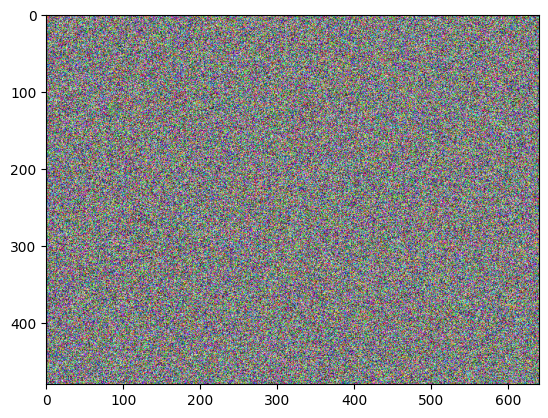

In [8]:
import cv2
import numpy as np

# Load the binary image
img = cv2.imread('fd.jpg', 0)



colored_labels = ccl(img)

plt.imshow(colored_labels)
plt.show()

# # Invert the image
# img = cv2.bitwise_not(img)

# # Perform connected component labeling
# ret, labels = cv2.connectedComponents(img)

# # Create a mask for the background (label 0)
# bg_mask = np.zeros_like(labels)
# bg_mask[labels == 0] = 255

# # Iterate over the connected components and count holes
# num_holes = 0
# for i in range(1, ret):
#     # Create a mask for the current component
#     mask = np.zeros_like(labels)
#     mask[labels == i] = 255

#     # Find the intersection of the current component and the background
#     intersection = cv2.bitwise_and(mask, bg_mask)

#     # Count the number of holes in the current component
#     contours, hierarchy = cv2.findContours(intersection, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
#     num_holes += len(contours)

# print("Number of holes:", num_holes)

In [4]:
labels

array([[     1,      2,      3, ...,    638,    639,    640],
       [   641,    642,    643, ...,   1278,   1279,   1280],
       [  1281,   1282,   1283, ...,   1918,   1919,   1920],
       ...,
       [305281, 305282, 305283, ..., 305918, 305919, 305920],
       [305921, 305922, 305923, ..., 306558, 306559, 306560],
       [306561, 306562, 306563, ..., 307198, 307199, 307200]])